# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nishrina Khoirunnisa
- **Email:** m128b4kx3387@bangkit.academy
- **ID Dicoding:** nishrinak

## Menentukan Pertanyaan Bisnis



```
`# This is formatted as code`
```

- When is the highest bike rental time during the day?
- How does the weather affect the number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

At this stage, data collection was conducted from an existing dataset, namely the bike rental data.

In [51]:
# Loading the dataset from GitHub
day_df = pd.read_csv('https://raw.githubusercontent.com/nishnisa/submission/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/nishnisa/submission/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The 'day.csv' data provides an overview of daily bike rental trends, with supporting details in table columns such as weather, holiday, and workingday, to aid in the analysis of bike rentals.
- The 'hour.csv' data itself provides even more comprehensive and detailed information by offering an analysis of rental patterns on an hourly basis throughout the day.

### Assessing Data

This stage includes the process of assessing the quality of the collected data. The purpose of this stage is to identify issues or inconsistencies in the data that need to be cleaned, such as missing values, duplicates, or outliers.

In [53]:
#check the data types of each column in a DataFrame

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [54]:
#check for duplicate data in

print("Jumlah duplikasi: ",day_df.duplicated().sum())
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [55]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- From these results, it can be concluded that there are no missing values and no duplicate entries in either dataset (day.csv and hour.csv). All columns contain complete data.
- There are some data types that are not quite appropriate, such as the dteday column, which is of type object and should be changed to datetime. Additionally, columns like season, holiday, weekday, workingday, and weathersit can be converted to category type to make memory usage more efficient and data analysis more accurate.
- There is an anomaly in the minimum value in the humidity (hum) column, where a value of 0.00 is present. This is most likely due to an inaccurate value, as humidity is unlikely to ever reach 0.

### Cleaning Data

In the data cleaning stage, several important steps were taken, such
 1. replacing the 0 values in the humidity column with the median value
 2. changing the data type of the date column to datetime for more accurate time analysis.
 3. categorical columns like season, workingday, and weathersit were remapped.

In [57]:
#Calculating the median of the humidity (hum) column

median_hum_day = day_df['hum'].median()
median_hum_hour = hour_df['hum'].median()

In [58]:
# Replacing humidity values of 0 with the median value

day_df['hum'].replace(0.00, median_hum_day, inplace=True)
hour_df['hum'].replace(0.00, median_hum_hour, inplace=True)

<ipython-input-58-f3a9b0c012ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['hum'].replace(0.00, median_hum_day, inplace=True)
<ipython-input-58-f3a9b0c012ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [59]:
# Ensuring that the humidity values have been successfully replaced with the median value.

day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
# Ensuring that the humidity values have been successfully replaced with the median value.

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- After replacing the 0 values in humidity with the median, no significant changes were observed in other statistics. However, this is still important to ensure that the data does not contain incorrect values.
- Replacing the 0 values with the median helps make the humidity data distribution more reasonable, leading to more accurate analysis of bike rentals in relation to weather conditions.

In [61]:
# Changing the data type of the date column to datetime.
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [62]:
#Ensuring that the data type has been successfully changed.
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

I conducted an exploration of the bike rental dataset to observe various trends, such as the impact of weather on rentals, the most popular times for renting bikes, and the number of rentals on weekdays versus holidays.

### Explore ...

In [63]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [64]:
# explore the number of bike rentals based on weather conditions

weather_stats = day_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "max", "min", "std"]
}).reset_index()

print(weather_stats)

  weathersit          cnt                        
                     mean   max  min          std
0          1  4876.786177  8714  431  1879.483989
1          2  4035.862348  8362  605  1809.109918
2          3  1803.285714  4639   22  1240.284449


In [65]:
# explore the number of bike rentals based on working day

workingday_stats = day_df.groupby(by="workingday").agg({
    "cnt": ["mean", "max", "min", "std"]
}).reset_index()

print(workingday_stats)

  workingday          cnt                        
                     mean   max  min          std
0          0  4330.168831  8714  605  2052.141245
1          1  4584.820000  8362   22  1878.415583


In [66]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


In [67]:
# explore the number of bike rentals based on the hour of the day

hour_stats = hour_df.groupby(by="hr").agg({
    "cnt": ["mean", "max", "min", "std"]
}).reset_index()

print(hour_stats)

    hr         cnt                     
              mean  max min         std
0    0   53.898072  283   2   42.307910
1    1   33.375691  168   1   33.538727
2    2   22.869930  132   1   26.578642
3    3   11.727403   79   1   13.239190
4    4    6.352941   28   1    4.143818
5    5   19.889819   66   1   13.200765
6    6   76.044138  213   1   55.084348
7    7  212.064649  596   1  161.441936
8    8  359.011004  839   5  235.189285
9    9  219.309491  426  14   93.703458
10  10  173.668501  539   8  102.205413
11  11  208.143054  663  10  127.495536
12  12  253.315934  776   3  145.081134
13  13  253.661180  760  11  148.107657
14  14  240.949246  750  12  147.271574
15  15  251.233196  750   7  144.632541
16  16  311.983562  783  11  148.682618
17  17  461.452055  976  15  232.656611
18  18  425.510989  977  23  224.639304
19  19  311.523352  743  11  161.050359
20  20  226.030220  567  11  119.670164
21  21  172.314560  584   6   89.788893
22  22  131.335165  502   9   69.937782


In [68]:
# explore hourly bike rentals based on weather conditions

hour_weather_stats = hour_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "max", "min", "std"]
}).reset_index()

print(hour_weather_stats)

  weathersit         cnt                     
                    mean  max min         std
0          1  204.869272  977   1  189.487773
1          2  175.165493  957   1  165.431589
2          3  111.579281  891   1  133.781045
3          4   74.333333  164  23   77.925178


In [69]:
# Grouping Time into Morning, Afternoon, Evening
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_time)

# Grouping Weather into Descriptive Categories
def categorize_weather(weather):
    if weather == 1:
        return 'Clear'
    elif weather == 2:
        return 'Cloudy'
    elif weather == 3:
        return 'Bad Weather'

hour_df['weather_desc'] = hour_df['weathersit'].apply(categorize_weather)

# Grouping data to see average bike rentals based on Time of Day and Weather
grouped_df = hour_df.groupby(['time_of_day', 'weather_desc']).agg({'cnt': 'mean'}).reset_index()
grouped_df['time_of_day'] = pd.Categorical(grouped_df['time_of_day'], categories=['Morning', 'Afternoon', 'Evening'], ordered=True)

# Displaying the result
print(grouped_df)

  time_of_day weather_desc         cnt
0   Afternoon  Bad Weather  164.548052
1   Afternoon        Clear  326.954892
2   Afternoon       Cloudy  259.323397
3     Evening  Bad Weather   79.209469
4     Evening        Clear  139.033532
5     Evening       Cloudy  106.473430
6     Morning  Bad Weather  118.014837
7     Morning        Clear  218.022214
8     Morning       Cloudy  211.032187


In [70]:
# Grouping data by time of day and weather
cluster_counts = hour_df.groupby(['time_of_day', 'weathersit']).agg({'cnt': 'mean', 'cnt': 'sum'}).reset_index()

# Renaming weathersit values for better readability
cluster_counts['weathersit'] = cluster_counts['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Bad Weather'})

# Pivot table for easier comparison
pivot_cluster = cluster_counts.pivot_table(index='time_of_day', columns='weathersit', values='cnt', aggfunc='sum')

# Display the pivot table
print(pivot_cluster)

weathersit   Bad Weather   Clear  Cloudy
time_of_day                             
Afternoon          63351  942284  287071
Evening            55209  816822  220400
Morning            39771  579067  288481


**Morning Cluster:**

The average number of bike rentals in the morning is higher during clear weather compared to bad weather. This indicates that clear weather encourages more people to rent bikes in the morning.

**Afternoon Cluster:**

In the afternoon, bike rentals are significantly higher during clear and cloudy weather, with a sharp decrease during bad weather.

**Evening Cluster:**

The evening is the peak time for bike rentals during clear weather. However, during bad weather, evening rentals are also much lower.

**Insight:**
- In the day.csv table, it is found that weather significantly influences the number of bike rentals, with the highest average rentals occurring during clear weather. Additionally, although bike rentals are quite high on weekdays, there is an additional spike on holidays, indicating that holidays and clear weather are important factors that increase the number of bike rentals.
- In the hour.csv table, commuting hours tend to be the most popular times for bike rentals. Additionally, clear weather also clearly boosts bike rental activity, indicating that time and weather conditions greatly influence bike usage patterns.

## Visualization & Explanatory Analysis

### Pertanyaan 1: When is the highest bike rental time during the day?

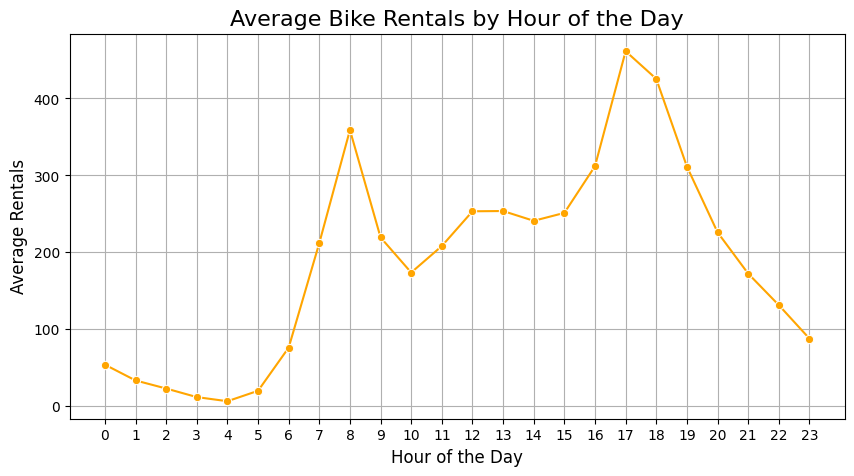

In [71]:
# Group the data by hour and calculate the mean count of bike rentals (cnt)
hourly_rentals = hour_df.groupby('hr').agg({'cnt': 'mean'}).reset_index()

# Plotting the results
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o', color='orange')
plt.title('Average Bike Rentals by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(0, 24))  # Showing hours from 0 to 23
plt.grid(True)
plt.show()

- This line chart shows the average number of bike rentals for each hour of the day. It helps to identify peak times when bikes are rented the most.
- The peak times for bike rentals are 8 AM and 5 PM, which correspond to the hours when people are likely commuting to and from work.



### Pertanyaan 2: How does the weather affect the number of bike rentals?

<ipython-input-72-63ac2126bbc2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

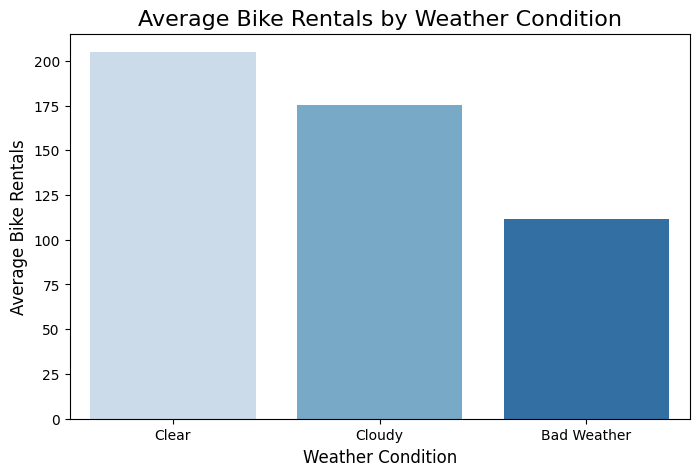

In [72]:
# Group the data by weather situation and calculate the mean of bike rentals (cnt)
weather_rentals = hour_df.groupby('weathersit').agg({'cnt': 'mean'}).reset_index()

# Mapping weather situation to labels
weather_rentals['weathersit'] = weather_rentals['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Bad Weather'
})

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='Blues')
plt.title('Average Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.show()


In this visualization, we observe how weather conditions affect the average number of bike rentals. The data shows that clear weather results in the highest number of rentals, followed by cloudy weather. On the other hand, bad weather significantly decreases the number of rentals.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


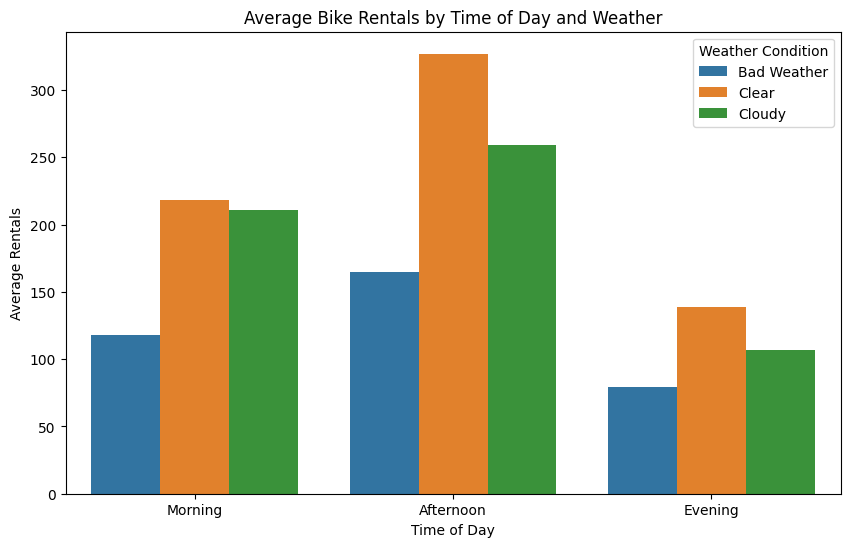

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='cnt', hue='weather_desc', data=grouped_df)
plt.title('Average Bike Rentals by Time of Day and Weather')
plt.xlabel('Time of Day')
plt.ylabel('Average Rentals')
plt.legend(title='Weather Condition')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


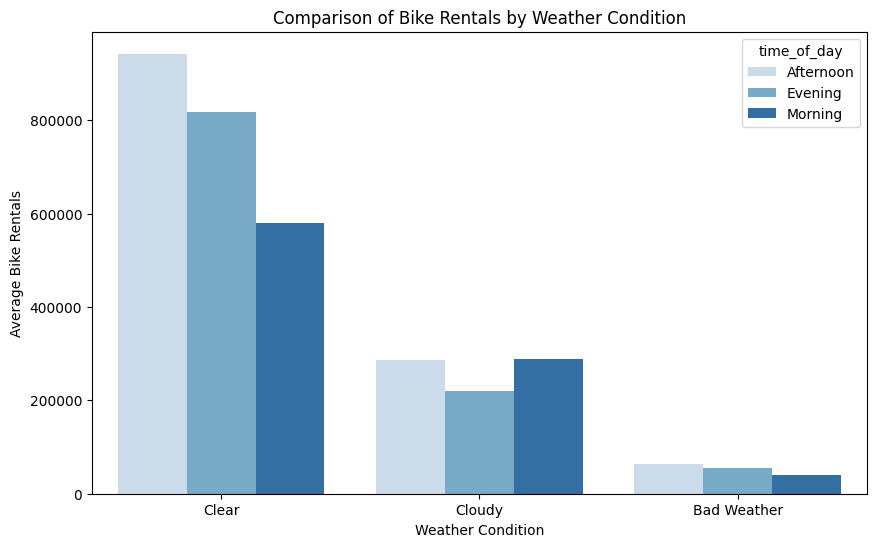

In [74]:
# Filtering data for comparison
morning_data = cluster_counts[cluster_counts['time_of_day'] == 'Morning']
afternoon_data = cluster_counts[cluster_counts['time_of_day'] == 'Afternoon']

# Plotting comparison for different weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', hue='time_of_day', data=cluster_counts, palette='Blues')
plt.title('Comparison of Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.show()

**Insight:**
- From the hourly bike rental graph, it is clear that 8 AM and 5 PM are the busiest times. These times usually coincide with commuting hours, which means many people use bikes as a daily transportation method during these times.
- From the weather data, it's clear that people prefer to rent bikes when the weather is clear. Bad weather significantly reduces the number of rentals. So, good weather makes people more comfortable cycling, while bad weather causes rentals to drop.
- We grouped the data into different clusters based on the time of day (morning, afternoon, evening) and weather conditions (clear, cloudy, bad weather). This helps us understand how bike rentals vary under different conditions.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1, From the weather data, it's clear that people prefer to rent bikes when the weather is clear. Bad weather significantly reduces the number of rentals. So, good weather makes people more comfortable cycling, while bad weather causes rentals to drop.
- Conclution pertanyaan 2, Clear weather encourages more people to rent bikes, while bad weather drastically reduces rentals. This shows how important weather conditions are for outdoor cycling activities.
- The highest bike rental times are during commuting hours, at 8 AM and 5 PM.
- Weather plays a significant role in bike rentals, with clear weather having the highest rentals, and bad weather resulting in the least.
These insights suggest that increasing bike availability during peak hours and offering promotions on days with bad weather could improve rentals.